In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:}'.format


---
##### **함수**

In [4]:
# 결측치 수 출력하는 함수 생성
def find_missing_value(df):
    print("결측치 확인\n")
    
    for column in df.columns:
        missing_count = df[column].isnull().sum()
        print(f"{column}: {missing_count}")


In [59]:
# 이상치 확인하는 함수 생성
def find_outlier(df, threshold = 3):
    print("이상치 확인\n")
    
    # 이상치 판별에서 제외할 column 설정
    exclusions = ['행정동', '기준_년분기_코드']
    
    for column in df.columns:
        if column in exclusions:
            continue
        mean = df[column].mean()  # 열의 평균
        std = df[column].std()    # 열의 표준 편차
        
        # 이상치 여부 판별
        outlier = np.abs(df[column] - mean) > threshold * std
        if outlier.any():
            print(f"{column}| 평균: %.2f" % (mean))
            outliers = df.loc[outlier, ['행정동', '기준_년분기_코드', column]]
            for idx, row in outliers.iterrows():
                print(f"\t{row[column]}({row['행정동']} {row['기준_년분기_코드']})")
        else:
            print(f"{column}| 없음")


In [60]:
# 이상치 반환하는 함수 생성
def return_outlier(df, threshold = 3):
    exclusions = ['행정동', '기준_년분기_코드']
    outliers_list = []
    
    for column in df.columns:
        if column in exclusions:
            continue
        mean = df[column].mean()
        std = df[column].std()
        
        outlier = np.abs(df[column] - mean) > threshold * std
        if outlier.any():
            outliers = df.loc[outlier, ['행정동', '기준_년분기_코드', column]]
            for idx, row in outliers.iterrows():
                # [행정동, 기준_년분기_코드, 이상치가 발견된 column, 이상치] 로 이루어진 list 생성
                outliers_list.append([row['행정동'], row['기준_년분기_코드'], column, row[column]])

    return outliers_list if outliers_list else None


In [61]:
# 이상치 제거한 데이터프레임을 반환하는 함수 생성
def remove_outliers(df, outliers_list):
    new_df = df.copy()
    
    for outlier in outliers_list:
        new_df = new_df.drop(new_df[(new_df['행정동'] == outlier[0]) & (new_df['기준_년분기_코드'] == outlier[1]) & (new_df[outlier[2]] == outlier[3])].index)
    
    return new_df


In [62]:
# 총인구수, 남성인구수, 여성인구수로 boxplot 만드는 함수 생성
def make_boxplot(df, title, columns_):
    df = df[columns_]
    plt.figure(figsize = (10, 6))
    plt.rcParams['font.family'] = 'NanumGothic'    
    plt.boxplot(df, vert = False)
    plt.title(title)
    plt.xlabel('인구 수')
    plt.yticks([1, 2, 3], ['여', '남', '총'])
    plt.show()

# 데이터프레임에서 이상치를 제거하여 총인구수, 남성인구수, 여성인구수로 boxplot 만드는 함수 생성
def new_make_boxplot(df, title, columns_):
    plt.figure(figsize = (10, 6))
    plt.rcParams['font.family'] = 'NanumGothic'
    new_columns = ['행정동', '기준_년분기_코드'] + columns_
    df = df[new_columns]
    outliers = return_outlier(df)
    df = remove_outliers(df, outliers)
    # boxplot 그리기 위해 필요 없는 column 제거
    df = df.drop(['행정동', '기준_년분기_코드'], axis=1)
    plt.boxplot(df, vert = False)
    plt.title(title)
    plt.xlabel('인구 수')
    plt.yticks([1, 2, 3], ['여', '남', '총'])
    plt.show()


---

In [9]:
# 직장인구-행정동 파일 가져와서 데이터프레임 df 생성
path = '../csv/직장인구-행정동.csv'
df = pd.read_csv(path, encoding = 'cp949')

df.head()


,기준_년분기_코드,행정동_코드,행정동_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,20191,11680600,대치1동,3796,1554,2242,24,644,954,945,...,365,396,304,329,21,487,589,549,416,180
1,20191,11680730,일원1동,3606,1816,1790,5,409,610,833,...,335,416,426,422,2,195,275,417,533,368
2,20191,11680630,대치4동,27945,15764,12181,159,5724,9571,7266,...,5534,4511,2257,1108,135,3394,4037,2755,1314,546
3,20191,11680580,삼성1동,95170,56571,38599,393,22596,31912,21038,...,19363,14979,7704,4684,230,12918,12549,6059,4151,2692
4,20191,11680510,신사동,31254,14082,17172,1293,11195,8398,5274,...,4034,2734,1435,1239,801,7047,4364,2540,1665,755


In [10]:
# 결측치 확인
find_missing_value(df)


결측치 확인

기준_년분기_코드: 0
행정동_코드: 0
행정동_코드_명: 0
총_직장_인구_수: 0
남성_직장_인구_수: 0
여성_직장_인구_수: 0
연령대_10_직장_인구_수: 0
연령대_20_직장_인구_수: 0
연령대_30_직장_인구_수: 0
연령대_40_직장_인구_수: 0
연령대_50_직장_인구_수: 0
연령대_60_이상_직장_인구_수: 0
남성연령대_10_직장_인구_수: 0
남성연령대_20_직장_인구_수: 0
남성연령대_30_직장_인구_수: 0
남성연령대_40_직장_인구_수: 0
남성연령대_50_직장_인구_수: 0
남성연령대_60_이상_직장_인구_수: 0
여성연령대_10_직장_인구_수: 0
여성연령대_20_직장_인구_수: 0
여성연령대_30_직장_인구_수: 0
여성연령대_40_직장_인구_수: 0
여성연령대_50_직장_인구_수: 0
여성연령대_60_이상_직장_인구_수: 0


In [11]:
# 데이터프레임 df의 행정동_코드_명'에서 숫자 제외해 새로운 column '행정동' 생성
df['행정동'] = df['행정동_코드_명'].apply(lambda x: x.replace('1', '').replace('2', '').replace('4', ''))

df.head()


,기준_년분기_코드,행정동_코드,행정동_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,...,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수,행정동
0,20191,11680600,대치1동,3796,1554,2242,24,644,954,945,...,396,304,329,21,487,589,549,416,180,대치동
1,20191,11680730,일원1동,3606,1816,1790,5,409,610,833,...,416,426,422,2,195,275,417,533,368,일원동
2,20191,11680630,대치4동,27945,15764,12181,159,5724,9571,7266,...,4511,2257,1108,135,3394,4037,2755,1314,546,대치동
3,20191,11680580,삼성1동,95170,56571,38599,393,22596,31912,21038,...,14979,7704,4684,230,12918,12549,6059,4151,2692,삼성동
4,20191,11680510,신사동,31254,14082,17172,1293,11195,8398,5274,...,2734,1435,1239,801,7047,4364,2540,1665,755,신사동


---
##### **전체 데이터** (new_df_all)

In [12]:
# '행정동', '기준_년분기_코드'를 기준으로 값을 합산한 새로운 데이터프레임 new_df_all 생성
# '행정동_코드', '행정동_코드_명' 포함 시 의미없는 값이 생성되므로 제외
temp_df = df.drop(columns = ['행정동_코드', '행정동_코드_명'])
new_df_all = temp_df.groupby(['행정동', '기준_년분기_코드'], as_index = False).sum()

new_df_all.head()


,행정동,기준_년분기_코드,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,개포동,20191,13483,7730,5753,38,1557,2773,3462,3326,...,1609,1959,1842,1604,16,863,1164,1503,1484,723
1,개포동,20192,36389,23797,12592,156,5246,9687,9454,7530,...,6068,6729,5187,3178,89,2678,3619,2725,2343,1138
2,개포동,20193,36389,23797,12592,156,5246,9687,9454,7530,...,6068,6729,5187,3178,89,2678,3619,2725,2343,1138
3,개포동,20194,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006
4,개포동,20201,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006


In [13]:
# 이상치 판별
find_outlier(new_df_all)


이상치 확인

총_직장_인구_수| 없음
남성_직장_인구_수| 없음
여성_직장_인구_수| 없음
연령대_10_직장_인구_수| 평균: 322.71
	1293(신사동 20191)
	1314(역삼동 20191)
연령대_20_직장_인구_수| 없음
연령대_30_직장_인구_수| 없음
연령대_40_직장_인구_수| 없음
연령대_50_직장_인구_수| 없음
연령대_60_이상_직장_인구_수| 없음
남성연령대_10_직장_인구_수| 없음
남성연령대_20_직장_인구_수| 없음
남성연령대_30_직장_인구_수| 없음
남성연령대_40_직장_인구_수| 없음
남성연령대_50_직장_인구_수| 없음
남성연령대_60_이상_직장_인구_수| 없음
여성연령대_10_직장_인구_수| 평균: 175.71
	801(신사동 20191)
	797(역삼동 20191)
여성연령대_20_직장_인구_수| 없음
여성연령대_30_직장_인구_수| 없음
여성연령대_40_직장_인구_수| 없음
여성연령대_50_직장_인구_수| 평균: 5052.39
	21037(역삼동 20192)
	21037(역삼동 20193)
여성연령대_60_이상_직장_인구_수| 없음


In [14]:
# 이상치 반환
outliers = return_outlier(new_df_all)
outliers


[['신사동', 20191, '연령대_10_직장_인구_수', 1293],
 ['역삼동', 20191, '연령대_10_직장_인구_수', 1314],
 ['신사동', 20191, '여성연령대_10_직장_인구_수', 801],
 ['역삼동', 20191, '여성연령대_10_직장_인구_수', 797],
 ['역삼동', 20192, '여성연령대_50_직장_인구_수', 21037],
 ['역삼동', 20193, '여성연령대_50_직장_인구_수', 21037]]

시각화(Boxplot)

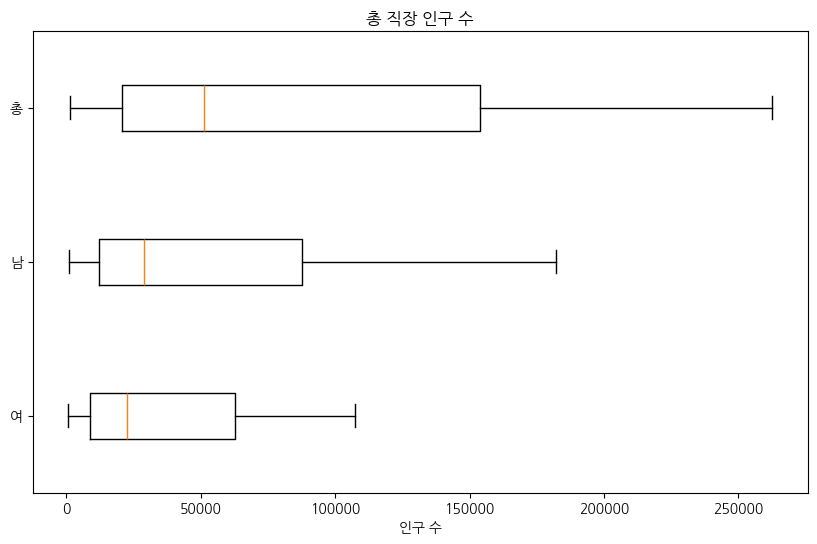

In [15]:
columns_ = ['여성_직장_인구_수', '남성_직장_인구_수', '총_직장_인구_수']
make_boxplot(new_df_all, "총 직장 인구 수", columns_)

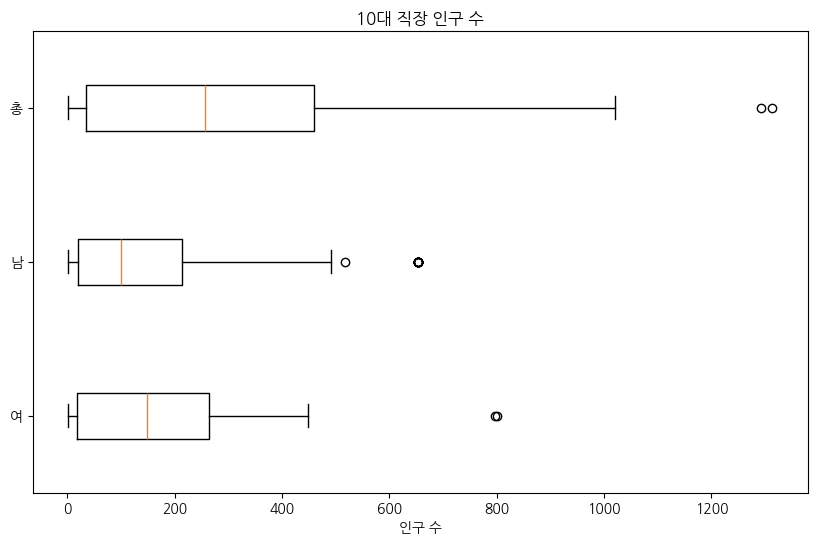

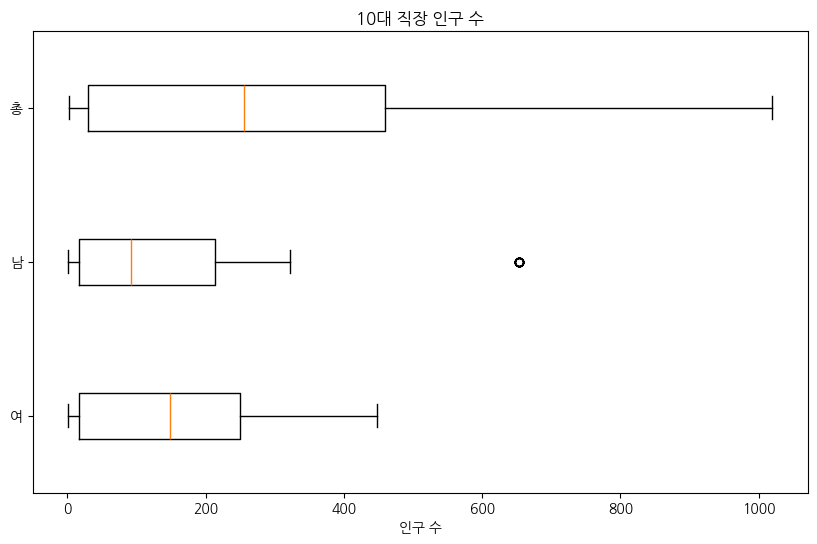

In [69]:
columns_ = ['여성연령대_10_직장_인구_수', '남성연령대_10_직장_인구_수', '연령대_10_직장_인구_수']
make_boxplot(new_df_all, '10대 직장 인구 수', columns_)
new_make_boxplot(new_df_all, '10대 직장 인구 수', columns_)


---
##### 직장인구-행정동 이상치
thershold = 3 기준으로 2019년에만 존재


In [17]:
# 이상치 확인
new_df_2019 = new_df_all[new_df_all['기준_년분기_코드'].astype(str).str.startswith('2019')].reset_index(drop = True)
find_outlier(new_df_2019)


이상치 확인

총_직장_인구_수| 없음
남성_직장_인구_수| 없음
여성_직장_인구_수| 없음
연령대_10_직장_인구_수| 평균: 311.62
	1293(신사동 20191)
	1314(역삼동 20191)
연령대_20_직장_인구_수| 없음
연령대_30_직장_인구_수| 없음
연령대_40_직장_인구_수| 없음
연령대_50_직장_인구_수| 없음
연령대_60_이상_직장_인구_수| 없음
남성연령대_10_직장_인구_수| 평균: 131.08
	654(도곡동 20194)
남성연령대_20_직장_인구_수| 없음
남성연령대_30_직장_인구_수| 없음
남성연령대_40_직장_인구_수| 없음
남성연령대_50_직장_인구_수| 없음
남성연령대_60_이상_직장_인구_수| 없음
여성연령대_10_직장_인구_수| 평균: 180.54
	801(신사동 20191)
	797(역삼동 20191)
여성연령대_20_직장_인구_수| 없음
여성연령대_30_직장_인구_수| 없음
여성연령대_40_직장_인구_수| 없음
여성연령대_50_직장_인구_수| 평균: 5032.29
	21037(역삼동 20192)
	21037(역삼동 20193)
여성연령대_60_이상_직장_인구_수| 없음


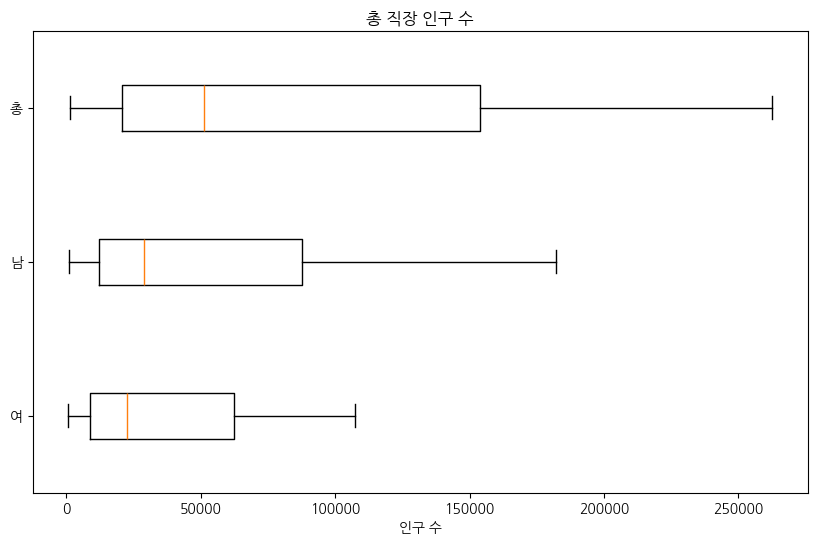

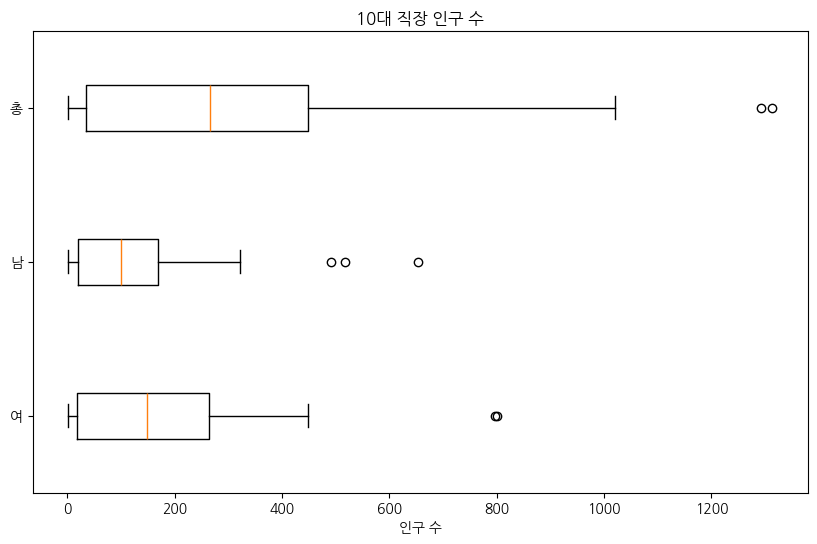

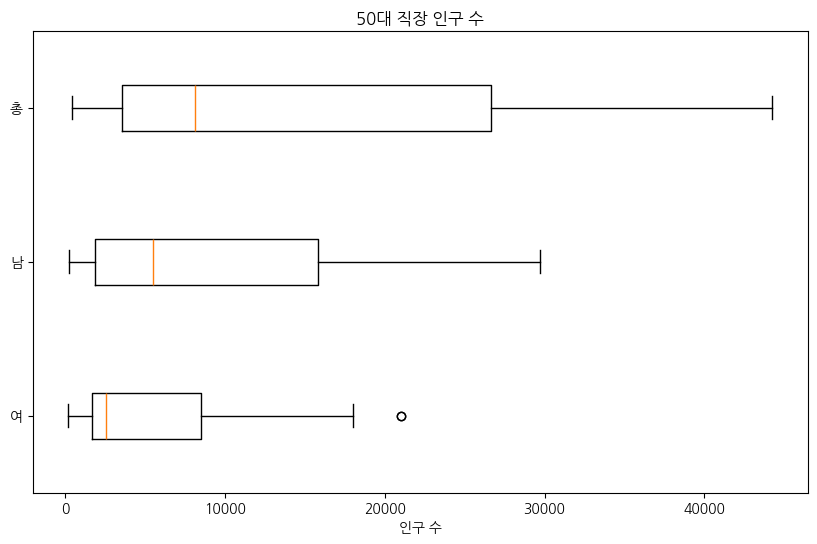

In [18]:
# 총 인구 수, 이상치가 발견된 나이대의 인구수 시각화
columns_ = ['여성_직장_인구_수', '남성_직장_인구_수', '총_직장_인구_수']
make_boxplot(new_df_2019, "총 직장 인구 수", columns_)
columns_ = ['여성연령대_10_직장_인구_수', '남성연령대_10_직장_인구_수', '연령대_10_직장_인구_수']
make_boxplot(new_df_2019, "10대 직장 인구 수", columns_)
columns_ = ['여성연령대_50_직장_인구_수', '남성연령대_50_직장_인구_수', '연령대_50_직장_인구_수']
make_boxplot(new_df_2019, "50대 직장 인구 수", columns_)

---
##### **2023년 데이터** (new_df_2023)

In [19]:
# new_df_all의 2023년 데이터만 가져와 새로운 데이터프레임 new_df_2023 생성
new_df_2023 = new_df_all[new_df_all['기준_년분기_코드'].astype(str).str.startswith('2023')].reset_index(drop = True)

new_df_2023.head()


,행정동,기준_년분기_코드,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,개포동,20231,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006
1,개포동,20232,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006
2,개포동,20233,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006
3,논현동,20231,96948,59641,37307,313,21458,28503,22161,14706,...,16996,15415,10508,7381,198,12232,11507,6746,4198,2426
4,논현동,20232,96948,59641,37307,313,21458,28503,22161,14706,...,16996,15415,10508,7381,198,12232,11507,6746,4198,2426


In [20]:
# 이상치 판별
find_outlier(new_df_2023)


이상치 확인

총_직장_인구_수| 없음
남성_직장_인구_수| 없음
여성_직장_인구_수| 없음
연령대_10_직장_인구_수| 없음
연령대_20_직장_인구_수| 없음
연령대_30_직장_인구_수| 없음
연령대_40_직장_인구_수| 없음
연령대_50_직장_인구_수| 없음
연령대_60_이상_직장_인구_수| 없음
남성연령대_10_직장_인구_수| 없음
남성연령대_20_직장_인구_수| 없음
남성연령대_30_직장_인구_수| 없음
남성연령대_40_직장_인구_수| 없음
남성연령대_50_직장_인구_수| 없음
남성연령대_60_이상_직장_인구_수| 없음
여성연령대_10_직장_인구_수| 없음
여성연령대_20_직장_인구_수| 없음
여성연령대_30_직장_인구_수| 없음
여성연령대_40_직장_인구_수| 없음
여성연령대_50_직장_인구_수| 없음
여성연령대_60_이상_직장_인구_수| 없음


시각화(Boxplot)

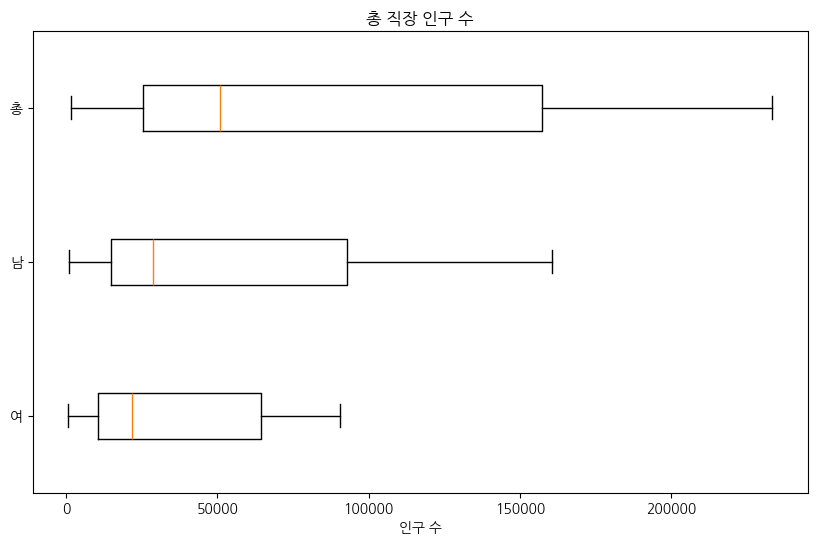

In [21]:
columns_ = ['여성_직장_인구_수', '남성_직장_인구_수', '총_직장_인구_수']
make_boxplot(new_df_2023, "총 직장 인구 수", columns_)

---
##### **2023년 2분기 데이터** (new_df_2023_2)

In [22]:
# new_df_2023의 2분기 데이터만 가져와 새로운 데이터프레임 new_df_2023_2 생성
new_df_2023_2 = new_df_2023[new_df_2023['기준_년분기_코드'].astype(str) == '20232'].reset_index(drop = True)

new_df_2023_2.head()


,행정동,기준_년분기_코드,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,개포동,20232,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006
1,논현동,20232,96948,59641,37307,313,21458,28503,22161,14706,...,16996,15415,10508,7381,198,12232,11507,6746,4198,2426
2,대치동,20232,145735,82848,62887,716,25785,41874,35333,26208,...,24821,22708,14956,8692,448,14382,17053,12625,11252,7127
3,도곡동,20232,233465,160677,72788,1020,43781,85202,66712,30298,...,58080,51100,22992,4647,366,20577,27122,15612,7306,1805
4,삼성동,20232,192322,123551,68771,460,38753,59182,50651,31900,...,37655,36247,23060,7084,246,19462,21527,14404,8840,4292


In [23]:
# 이상치 판별
find_outlier(new_df_2023_2)


이상치 확인

총_직장_인구_수| 없음
남성_직장_인구_수| 없음
여성_직장_인구_수| 없음
연령대_10_직장_인구_수| 없음
연령대_20_직장_인구_수| 없음
연령대_30_직장_인구_수| 없음
연령대_40_직장_인구_수| 없음
연령대_50_직장_인구_수| 없음
연령대_60_이상_직장_인구_수| 없음
남성연령대_10_직장_인구_수| 없음
남성연령대_20_직장_인구_수| 없음
남성연령대_30_직장_인구_수| 없음
남성연령대_40_직장_인구_수| 없음
남성연령대_50_직장_인구_수| 없음
남성연령대_60_이상_직장_인구_수| 없음
여성연령대_10_직장_인구_수| 없음
여성연령대_20_직장_인구_수| 없음
여성연령대_30_직장_인구_수| 없음
여성연령대_40_직장_인구_수| 없음
여성연령대_50_직장_인구_수| 없음
여성연령대_60_이상_직장_인구_수| 없음


시각화(Boxplot)

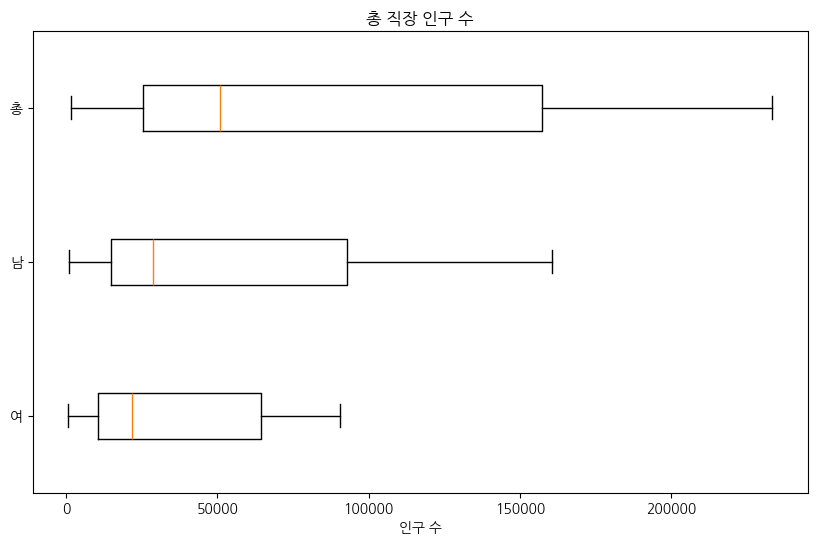

In [24]:
columns_ = ['여성_직장_인구_수', '남성_직장_인구_수', '총_직장_인구_수']
make_boxplot(new_df_2023_2, "총 직장 인구 수", columns_)

---

In [27]:
print(new_df_all['행정동'].unique())


['개포동' '논현동' '대치동' '도곡동' '삼성동' '세곡동' '수서동' '신사동' '압구정동' '역삼동' '일원동' '청담동']


In [33]:
행정동_list = ['개포동', '논현동', '대치동', '도곡동', '삼성동', '세곡동', '수서동', '신사동', '압구정동', '역삼동', '일원동', '청담동']
행정동_index = {행정동: index for index, 행정동 in enumerate(행정동_list)}
행정동_index


{'개포동': 0,
 '논현동': 1,
 '대치동': 2,
 '도곡동': 3,
 '삼성동': 4,
 '세곡동': 5,
 '수서동': 6,
 '신사동': 7,
 '압구정동': 8,
 '역삼동': 9,
 '일원동': 10,
 '청담동': 11}

In [44]:
new_df = []
for i in range(len('행정동_list')):
    new_df.append(new_df_all.loc[new_df_all['행정동'] == 행정동_list[i]].copy())

new_df[0]


,행정동,기준_년분기_코드,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,개포동,20191,13483,7730,5753,38,1557,2773,3462,3326,...,1609,1959,1842,1604,16,863,1164,1503,1484,723
1,개포동,20192,36389,23797,12592,156,5246,9687,9454,7530,...,6068,6729,5187,3178,89,2678,3619,2725,2343,1138
2,개포동,20193,36389,23797,12592,156,5246,9687,9454,7530,...,6068,6729,5187,3178,89,2678,3619,2725,2343,1138
3,개포동,20194,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006
4,개포동,20201,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006
5,개포동,20202,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006
6,개포동,20203,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006
7,개포동,20204,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006
8,개포동,20211,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006
9,개포동,20212,36675,23848,12827,130,5594,9562,9532,7671,...,5834,6740,5333,3180,77,2886,3728,2792,2338,1006


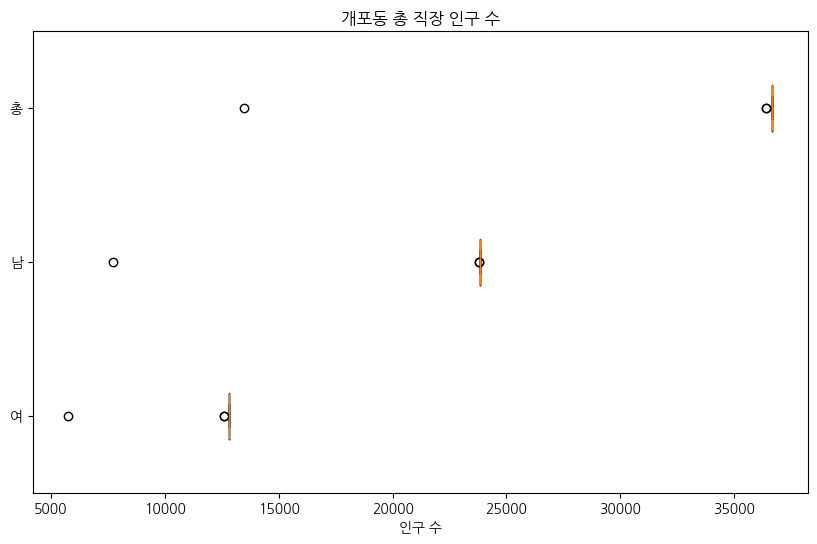

이상치 확인

총_직장_인구_수| 평균: 35424.26
	13483(개포동 20191)
남성_직장_인구_수| 평균: 22994.32
	7730(개포동 20191)
여성_직장_인구_수| 평균: 12429.95
	5753(개포동 20191)
연령대_10_직장_인구_수| 평균: 127.89
	38(개포동 20191)
연령대_20_직장_인구_수| 평균: 5344.89
	1557(개포동 20191)
연령대_30_직장_인구_수| 평균: 9217.84
	2773(개포동 20191)
연령대_40_직장_인구_수| 평균: 9204.32
	3462(개포동 20191)
연령대_50_직장_인구_수| 평균: 7427.47
	3326(개포동 20191)
연령대_60_이상_직장_인구_수| 평균: 4101.84
	2327(개포동 20191)
남성연령대_10_직장_인구_수| 평균: 52.84
	22(개포동 20191)
남성연령대_20_직장_인구_수| 평균: 2587.26
	694(개포동 20191)
남성연령대_30_직장_인구_수| 평균: 5636.26
	1609(개포동 20191)
남성연령대_40_직장_인구_수| 평균: 6487.21
	1959(개포동 20191)
남성연령대_50_직장_인구_수| 평균: 5133.89
	1842(개포동 20191)
남성연령대_60_이상_직장_인구_수| 평균: 3096.84
	1604(개포동 20191)
여성연령대_10_직장_인구_수| 평균: 75.05
	16(개포동 20191)
여성연령대_20_직장_인구_수| 평균: 2757.63
	863(개포동 20191)
여성연령대_30_직장_인구_수| 평균: 3581.58
	1164(개포동 20191)
여성연령대_40_직장_인구_수| 평균: 2717.11
	1503(개포동 20191)
여성연령대_50_직장_인구_수| 평균: 2293.58
	1484(개포동 20191)
여성연령대_60_이상_직장_인구_수| 평균: 1005.00
	723(개포동 20191)


In [71]:
columns_ = ['여성_직장_인구_수', '남성_직장_인구_수', '총_직장_인구_수']
make_boxplot(new_df[0], "개포동 총 직장 인구 수", columns_)
find_outlier(new_df[0])
